# Predicting Outcomes

**Objective: Develop a classification model to predict the presence of heart disease based on patient demographics and health metrics.**

## Imports

**TASK: Run the cell below to import the necessary libraries.**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data

The dataset comprises 14 physical characteristics derived from patient evaluations. These measurements were collected through blood tests and exercise assessments. The target variable indicates the presence or absence of heart disease (1 for present, 0 for absent). Given the often invasive nature of definitively diagnosing heart disease, a predictive model could significantly aid in identifying patients at high risk, potentially reducing the need for extensive diagnostic procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease



----


In [ ]:
df = pd.read_csv('heart.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df['target'].unique()

array([1, 0])

In [ ]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

### Exploratory Data Analysis and Visualization


Exploring if the dataset has any missing data points and creating a statistical summary of the numerical features.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### Visualization Tasks

Creating a bar plot that shows the total counts per target value.

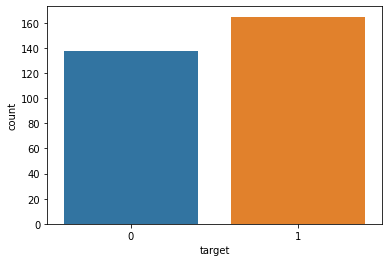

In [ ]:
sns.countplot(x=df['target']);

Creating a pairplot that displays the relationships between the following columns:

    ['age','trestbps', 'chol','thalach','target']
   

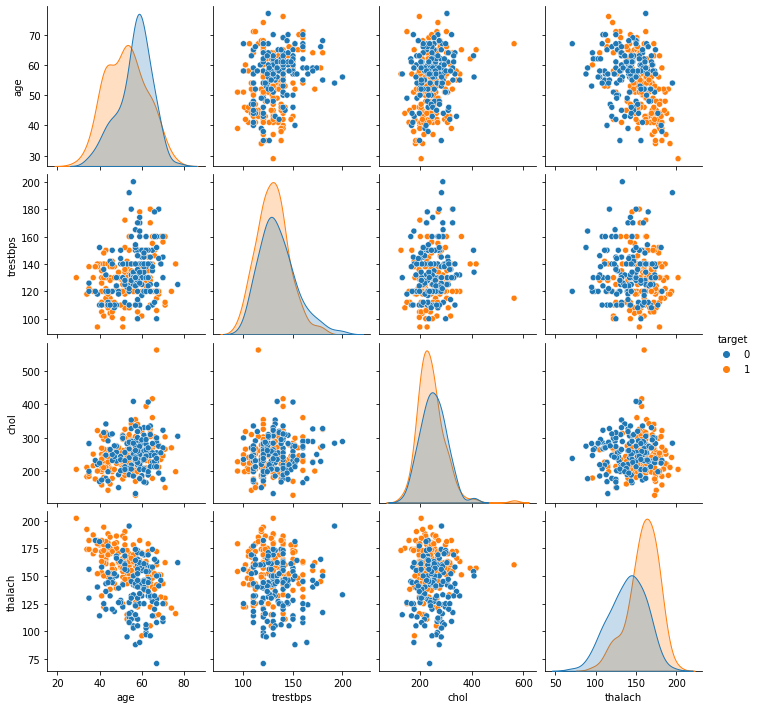

In [ ]:
sns.pairplot(data=df[['age','trestbps', 'chol','thalach','target']], hue='target');

**TASK: Create a heatmap that displays the correlation between all the columns.**

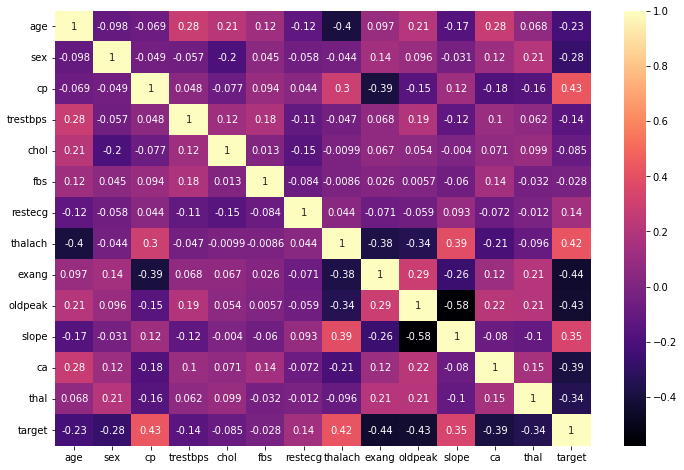

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='magma');

----
----

# Machine Learning

## Train | Test Split and Scaling

**Separating the features from the labels into 2 objects, X and y.**

In [ ]:
X = df.drop(columns='target')
y = df['target']

**Performing a train test split on the data, with the test size of 10% and a random_state of 101.**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

**Creating a StandardScaler object and normalizing the X train and test set feature data. Making sure to only fit to the training data to avoid data leakage (data knowledge leaking from the test set).**

In [ ]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
13,64,1,3,110,211,0,0,144,1,1.8,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3
128,52,0,2,136,196,0,0,169,0,0.1,1,0,2
119,46,0,0,138,243,0,0,152,1,0.0,1,0,2


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression and Support Vector Classifier Models

**Creating Logistic Regression and SVC models and using Cross-Validation to find well-performing values for the hyper-parameter search.**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
log_model = LogisticRegression(max_iter=100000)
svc_model = SVC()

In [ ]:
solver = ['saga', 'lbfgs']
penalty = ['l2', 'elasticnet']
l1_ratio = np.linspace(0, 1, 10)
C = np.logspace(-4, 4, 10)

lr_param_grid = {'penalty': penalty,
              'l1_ratio': l1_ratio,
              'solver': solver,
              'C': C}

lr_grid_model = GridSearchCV(log_model, param_grid=lr_param_grid, cv=5, scoring='f1')

lr_grid_model.fit(X_train_scaled, y_train)

In [ ]:
C = np.logspace(-4, 4, 10)
kernel = ['poly', 'rbf', 'sigmoid']
degree = [1,2,3,4]

svc_param_grid = {"C": C,
                  "kernel": kernel,
                  "degree": degree,
                  'probability': [True]}

svc_grid_model = GridSearchCV(svc_model, param_grid=svc_param_grid, cv=5, scoring='f1')
svc_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                         'degree': [1, 2, 3, 4],
                         'kernel': ['poly', 'rbf', 'sigmoid'],
                         'probability': [True]},
             scoring='f1')

**TASK: Report back your search's optimal parameters, specifically the C value.** 

*Note: You may get a different value than what is shown here depending on how you conducted your search.*

In [ ]:
lr_grid_model.best_estimator_

LogisticRegression(C=0.046415888336127774, l1_ratio=0.0, max_iter=100000,
                   solver='saga')

In [ ]:
svc_grid_model.best_estimator_

SVC(C=2.782559402207126, degree=1, kernel='poly', probability=True)

### Coefficients

**TASK: Report back the model's coefficients.**

In [ ]:
lr_grid_model.best_estimator_.coef_

array([[-0.07493942, -0.19618473,  0.30481866, -0.06560433, -0.03226521,
         0.        ,  0.04043371,  0.19797551, -0.22587126, -0.22160368,
         0.16174517, -0.27539326, -0.21859801]])

In [ ]:
model_coef = pd.Series(data=lr_grid_model.best_estimator_.coef_[0], index=X.columns)

model_coef = model_coef.sort_values()

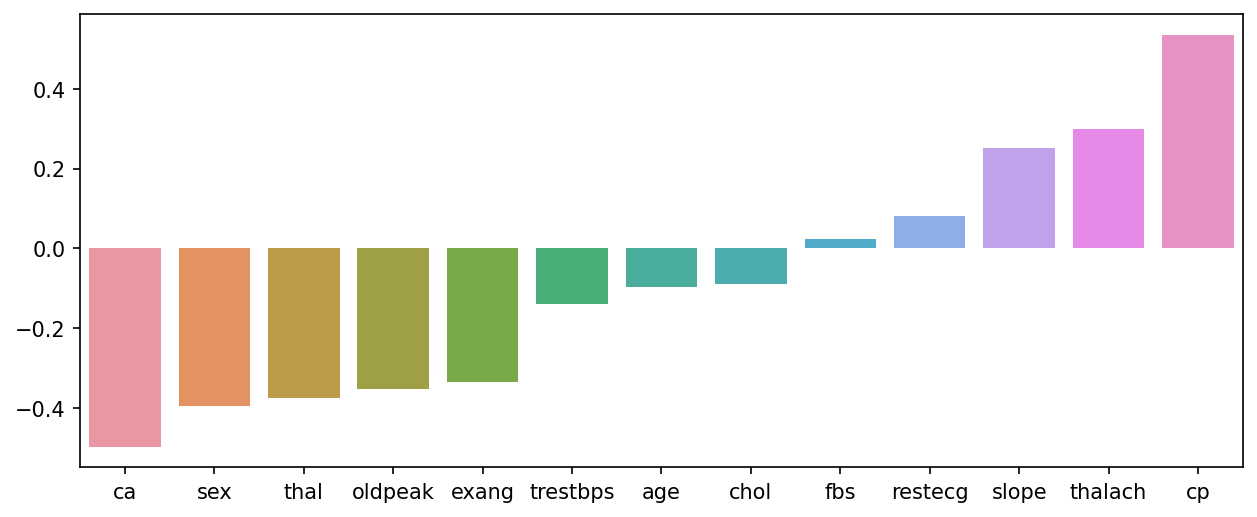

In [ ]:
plt.figure(figsize=(10,4), dpi=150)
sns.barplot(x=model_coef.index, y=model_coef.values);

---------

## Model Performance Evaluation

**Evaluating the models on the remaining 10% of the data, the test set.**

**For evaluations:**
* Confusion Matrix
* Classification Report

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



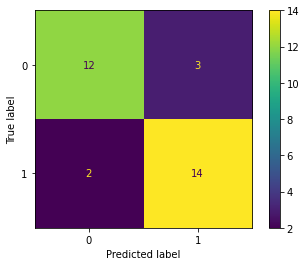

In [ ]:
y_pred = lr_grid_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



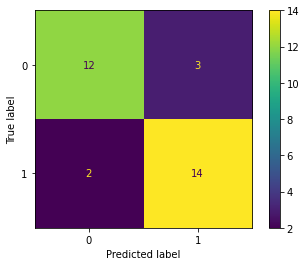

In [ ]:
y_pred2 = svc_grid_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred2))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred2);

### Performance Curves

**Creating both the precision recall curve and the ROC Curve.**

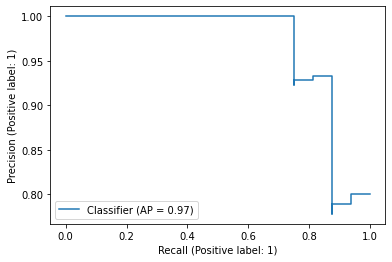

In [ ]:
from sklearn.metrics import  PrecisionRecallDisplay, RocCurveDisplay

y_proba = lr_grid_model.predict_proba(X_test_scaled)[:, 1]

PrecisionRecallDisplay.from_predictions(y_test, y_proba);

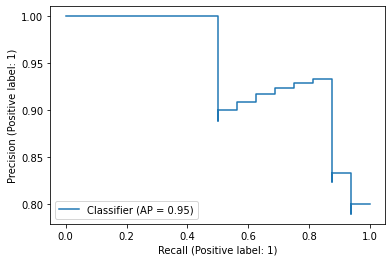

In [ ]:
y_proba2 = svc_grid_model.predict_proba(X_test_scaled)[:, 1]

PrecisionRecallDisplay.from_predictions(y_test, y_proba2);

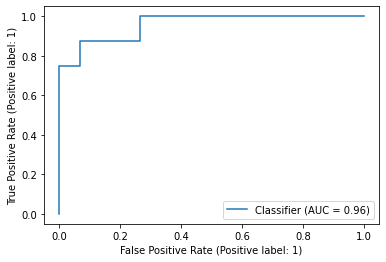

In [ ]:
RocCurveDisplay.from_predictions(y_test, y_proba);

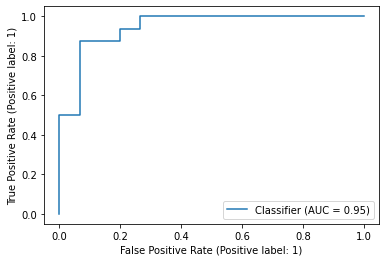

In [ ]:
RocCurveDisplay.from_predictions(y_test, y_proba2);

**Example: A patient with the following features has come into the medical office:**


**What would the model predict for this patient? Do they have heart disease? How "sure" is the model of this prediction?**

In [ ]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [ ]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

new_data = pd.DataFrame(patient, columns=X.columns)

In [ ]:
lr_grid_model.predict(scaler.transform(new_data))

array([0])

The model predicts the patient does not have a heart disease.

In [ ]:
# EXPECTED PROBABILITY PER CLASS (Basically model should be extremely sure its in the 0 class)
lr_grid_model.predict_proba(scaler.transform(new_data))

array([[0.94751225, 0.05248775]])